In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/jdariasl/DiplomadoEPM_2019/master/Modulo3/init.py
from init import init; init(force_download=False)

In [1]:
import sys
if 'google.colab' in sys.modules:
    print ("setting tensorflow version in colab")
    %tensorflow_version 2.x
    %load_ext tensorboard
import tensorflow as tf
tf.__version__

'2.1.0'

In [17]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import tensorflow as tf
from io import BytesIO
from six.moves import urllib
from tensorflow.keras.applications import inception_v3, InceptionV3
from tensorflow.keras.applications.inception_v3 import decode_predictions
from skimage.transform import resize, rescale
from IPython.display import Image
tf.__version__

'2.1.0'

# Lab: occlusion for interpretability

In this lab you will need to:

1. Load an image
2. Load InceptionV3
3. Obtain the most probable class from InceptionV3 prediction
4. Run a 100x100 occlusion window across the image with an overlapping stride of 10 pixels
5. For each position of the occlusion window record the model probability the class obtained in step 3
6. Create a heatmap with the recorded probabilities and scale it to the size of the original image
7. Plot the heatmap alongside the original image. You may also plot the heatmap over the image with some alpha


Use the following images, for which you should be getting the heatmap shown

**As you need to scale the images to 299x299x3, the resulting heatmaps must have a size of 21x21 pixels.**

The InceptionV3 with imagenet prediction class code fore the french horn should be 566 and for the oboe 683

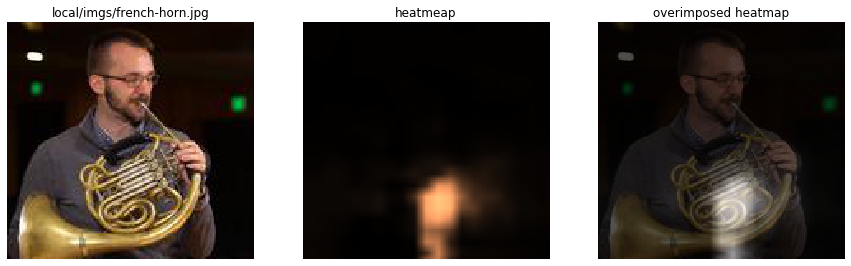

In [112]:
Image("local/imgs/french-horn-heatmap.png")

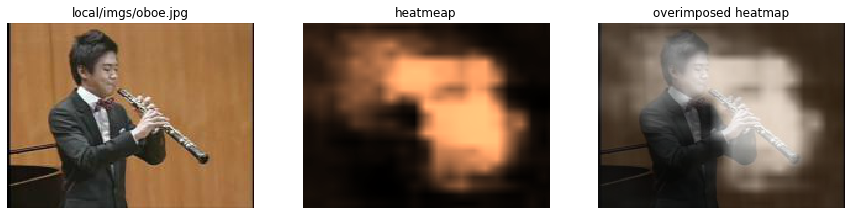

In [113]:
Image("local/imgs/oboe-heatmap.png")

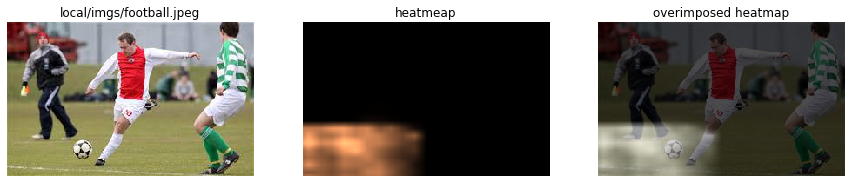

In [123]:
Image("local/imgs/football-heatmap.png")

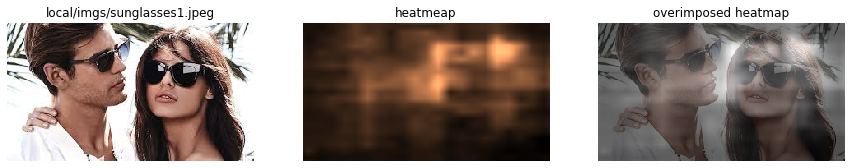

In [124]:
Image("local/imgs/sunglasses-heatmap.png")

## 1. Load and scale the image

In [ ]:
...

In [175]:
# k=b'0a696d66696c65203d20226c6f63616c2f696d67732f6672656e63682d686f726e2e6a7067220a23696d66696c65203d20226c6f63616c2f696d67732f6f626f652e6a7067220a696d66696c65203d20226c6f63616c2f696d67732f73756e676c6173736573312e6a706567220a696d66696c65203d20226c6f63616c2f696d67732f666f6f7462616c6c2e6a706567220a696d67203d20706c742e696d7265616428696d66696c65290a6f7269675f7368617065203d20696d672e73686170650a61696d67203d20726573697a6528696d672c206f75747075745f73686170653d283239392c3239392c3329290a7072696e7420286e702e6d696e2861696d67292c206e702e6d61782861696d67292c2061696d672e7368617065290a706c742e6669677572652866696773697a653d2831302c3429290a706c742e737562706c6f7428313231293b20706c742e696d73686f7728696d67293b20706c742e7469746c6528226f726967696e616c202573222573747228696d672e736861706529293b20706c742e6178697328226f666622293b0a706c742e737562706c6f7428313232293b20706c742e696d73686f772861696d67293b20706c742e7469746c6528227363616c656420257322257374722861696d672e736861706529293b20706c742e6178697328226f666622293b0a'
# import binascii; print (binascii.a2b_hex(k).decode())


## 2. use `model.predict` and get the class code with highest probability

make sure **image pixes are normalized to [-1,1]**

In [ ]:
...

In [188]:
#k = b'0a6d6f64656c203d20496e63657074696f6e563328776569676874733d27696d6167656e6574272c20696e636c7564655f746f703d54727565290a70726564203d206d6f64656c2e707265646963742861696d672e72657368617065282d312c2a61696d672e7368617065292a322d31290a0a636c6173735f636f6465203d206e702e6172676d617828707265645b305d290a7072696e74202822686967686573742070726f626162696c69747920636c6173733a22290a7072696e7420282220202020636c6173735f636f6465222c20636c6173735f636f6465290a7072696e742028222020202070726f6162696c697479222c20707265645b305d5b636c6173735f636f64655d290a7072696e74202827746f7020313020636c6173732070726f626162696c69746965733a27290a666f72206920696e206465636f64655f70726564696374696f6e7328707265642c20746f703d3130295b305d3a0a202020207072696e74282225313073202532307320252e3666222569290a'
#import binascii; print (binascii.a2b_hex(k).decode())


model = InceptionV3(weights='imagenet', include_top=True)
pred = model.predict(aimg.reshape(-1,*aimg.shape)*2-1)

class_code = np.argmax(pred[0])
print ("highest probability class:")
print ("    class_code", class_code)
print ("    proability", pred[0][class_code])
print ('top 10 class probabilities:')
for i in decode_predictions(pred, top=10)[0]:
    print("%10s %20s %.6f"%i)



## 3. Compute a probabilty heatmat by sliding an occlusion across the image

- the probability heatmat must refer to the highest probablity class identified just above

In [ ]:
...

In [179]:
# k = b'0a696d706f7274206d6174680a66726f6d2070726f677265737362617220696d706f72742070726f677265737362617220617320706261720a7072696e742028226275696c64696e6720696d6167652073657422290a6f63636c7564696e675f73697a65203d203130300a6f63636c7564696e675f737472696465203d2031300a6f63636c7564696e675f706978656c203d206e702e6d61782861696d67290a6865696768742c2077696474682c205f203d2061696d672e73686170650a6f75747075745f686569676874203d20696e74286d6174682e6365696c28286865696768742d6f63636c7564696e675f73697a6529202f206f63636c7564696e675f737472696465202b203129290a6f75747075745f7769647468203d20696e74286d6174682e6365696c282877696474682d6f63636c7564696e675f73697a6529202f206f63636c7564696e675f737472696465202b203129290a686561746d6170203d206e702e7a65726f7328286f75747075745f6865696768742c206f75747075745f776964746829290a0a70696d6773203d206e702e7a65726f73285b6f75747075745f6865696768742a6f75747075745f77696474685d2b6c6973742861696d672e736861706529290a63203d20300a666f72206820696e20706261722872616e6765286f75747075745f68656967687429293a0a20202020666f72207720696e2072616e6765286f75747075745f7769647468293a0a202020202020202023204f63636c7564657220726567696f6e3a0a2020202020202020685f7374617274203d2068202a206f63636c7564696e675f7374726964650a2020202020202020775f7374617274203d2077202a206f63636c7564696e675f7374726964650a2020202020202020685f656e64203d206d696e286865696768742c20685f7374617274202b206f63636c7564696e675f73697a65290a2020202020202020775f656e64203d206d696e2877696474682c20775f7374617274202b206f63636c7564696e675f73697a65290a2020202020202020232047657474696e672074686520696d61676520636f70792c206170706c79696e6720746865206f63636c7564696e672077696e646f7720616e6420636c617373696679696e6720697420616761696e3a0a20202020202020206f696d67203d2061696d672e636f707928290a20202020202020206f696d675b685f73746172743a685f656e642c20775f73746172743a775f656e642c3a5d203d20206f63636c7564696e675f706978656c20202020202020202020202020202020202020200a202020202020202070696d67735b635d3d6f696d670a2020202020202020632b3d310a20202020202020200a20202020202020200a7072696e74202822696d67207365742073697a65222c2070696d67732e7368617065290a7072696e7420282270726564696374696e672e2e22290a202020200a7072656473203d206d6f64656c2e707265646963742870696d67732a322d31290a7072696e7420282270726564696374696f6e73207368617065222c2070726564732e7368617065290a0a7072696e742028226275696c64696e6720686561746d617022290a63203d20300a666f72206820696e2072616e6765286f75747075745f686569676874293a0a20202020666f72207720696e2072616e6765286f75747075745f7769647468293a0a2020202020202020686561746d61705b682c775d203d20312d70726564735b635d5b636c6173735f636f64655d0a202020202020202063202b3d20310a7072696e74202822686561746d6170207368617065222c20686561746d61702e7368617065290a'
# import binascii; print (binascii.a2b_hex(k).decode())

## 3. Plot the image alongside the probability heatmap

In [ ]:
...

In [184]:
#k = b'0a73686561746d6170203d20726573697a6528686561746d61702c206f7269675f73686170655b3a2d315d290a7072696e74202822686561746d61702073697a65222c20686561746d61702e73686170652c20227363616c656420686561746d61702073697a65222c2073686561746d61702e7368617065290a0a706c742e6669677572652866696773697a653d2831352c3629290a706c742e737562706c6f7428313331293b20706c742e696d73686f7728696d67293b20706c742e6178697328226f666622293b20706c742e7469746c6528696d66696c65290a706c742e737562706c6f7428313332293b20706c742e696d73686f772873686561746d61702c20636d61703d706c742e636d2e636f70706572293b20706c742e6178697328226f666622293b20706c742e7469746c652822686561746d65617022290a706c742e737562706c6f7428313333293b20706c742e696d73686f7728696d67293b20706c742e696d73686f772873686561746d61702c20636d61703d706c742e636d2e47726579735f722c616c7068613d2e37293b200a706c742e7469746c6528226f766572696d706f73656420686561746d617022290a706c742e6178697328226f666622293b0a'
#import binascii; print (binascii.a2b_hex(k).decode())
